# Frequency-Based Word Embeddings

## 1) Bag of Words

The **Bag of Words (BoW)** model is one of the simplest ways to represent text data numerically.

- Each document (sentence) is represented as a vector of word counts.

- The order of words is ignored — only their frequency matters.

- Example:

    - Sentence: `"The cat sat on the mat"`

    - Vocabulary:`{the, cat, sat, on, mat}`

    - Vector: `[2, 1, 1, 1, 1]`


In this first section, we’ll:

1) Import spaCy to help with text processing.

2) Define a corpus (a small set of example sentences).

3) Convert these sentences into their Bag of Words representation.

4) View the most common words in our corpus

5) Evaluate sentence similarity in our corpus



### A. Load spaCy, Small English Language Model, and Sample Sentences

In [2]:
#!python -m spacy download en_core_web_sm
#!pip install spacy

# Import spaCy
import spacy

# Load language model
nlp = spacy.load("en_core_web_sm")

### B. Define Corpus

In [3]:
# Define the corpus (the list of sentences/documents)
# Ignore the 1s and 0s for now
sentences = [
    "Massive earthquake hits California! Stay safe, everyone! #earthquake",  # 1
    "Flooding in Miami has left hundreds stranded. #flood #disaster",  # 1
    "Breaking: Wildfire spreading fast near Los Angeles. Evacuate now! #wildfire",  # 1
    "Tornado warning issued for Oklahoma. Seek shelter immediately! #tornado",  # 1
    "Hurricane Katrina devastated the city, leaving thousands homeless. #hurricane",  # 1
    "Tsunami alert! Coastal areas urged to evacuate immediately. #tsunami",  # 1
    "Volcanic eruption in Indonesia causes widespread destruction. #volcano",  # 1
    "Flash floods have destroyed several homes in Texas. #flood",  # 1
    "Landslides in Nepal block major highways. Relief efforts underway. #landslide",  # 1
    "Blizzard warning for the Northeast. Expect heavy snowfall and power outages. #blizzard",  # 1
    "Cyclone making landfall in Australia. Residents urged to take precautions. #cyclone",  # 1
    "Severe drought in Africa affecting millions of people. #drought",  # 1
    "Powerful aftershocks continue to shake the city after the earthquake. #earthquake",  # 1
    "Deadly avalanche buries skiers in the Alps. Search and rescue operations ongoing. #avalanche",  # 1
    "Forest fire near Yosemite National Park threatens wildlife and homes. #wildfire",  # 1
    "Heavy rain in India causing flash floods and landslides. #flood",  # 1
    "Severe weather system causing tornadoes across the Midwest. #tornado",  # 1
    "A massive earthquake has leveled parts of Mexico City. #earthquake",  # 1
    "Monsoon rains flood streets in Bangkok, causing chaos for commuters. #monsoon",  # 1
    "Forest fires in Greece are threatening several towns. Evacuations ordered. #wildfire",  # 1
    "Tropical storm causes flooding and power outages in Florida. #storm",  # 1
    "Earthquake rattles Japan, triggering tsunami fears. #earthquake",  # 1
    "Mudslide wipes out entire villages in South America. #mudslide",  # 1
    "Blistering heatwave causes wildfires across Europe. #heatwave",  # 1
    "Floodwaters are rising fast in Houston. People are being rescued by boat. #flood",  # 1
    "Got a new puppy today! Can't wait to bring him home. #puppy",  # 0
    "Enjoying a peaceful weekend at the beach with friends. #vacation",  # 0
    "Can’t believe how good the new pizza place in town is! #foodie",  # 0
    "Taking my bike out for a ride through the city. #fitness",  # 0
    "Watching a movie with the family tonight. #movienight",  # 0
    "Finished a 5k run, feeling amazing! #runnerlife",  # 0
    "Celebrating my birthday with a huge cake! #birthday",  # 0
    "Loving this new book I picked up at the bookstore. #reading",  # 0
    "Spending the afternoon hiking through the woods. #nature",  # 0
    "Can’t wait for the concert tonight! It’s going to be epic! #concert",  # 0
    "The sunset over the mountains was absolutely beautiful. #sunset",  # 0
    "Had an amazing time at the theme park today! #familyfun",  # 0
    "Got my morning coffee, ready to start the day. #coffeelover",  # 0
    "Playing board games with the kids this afternoon. #familytime",  # 0
    "Adopted a new cat from the shelter. #adoptapet",  # 0
    "Baking cookies for the neighborhood bake sale. #baking",  # 0
    "Got tickets to the football game next weekend! #sports",  # 0
    "Can’t believe how nice the weather is today! #sunshine",  # 0
    "Taking a break from work to relax with a good book. #relaxation",  # 0
    "Exploring the city with friends, enjoying the sights. #adventure",  # 0
    "Weekend road trip with my besties! #roadtrip",  # 0
    "Gardening in the backyard all morning. Such a peaceful day. #gardening",  # 0
    "Spending time at the local farmer’s market today. #shoplocal",  # 0
    "Finished a yoga class. Feeling refreshed! #yoga",  # 0
    "Watching the game with friends and having a great time! #sportsfan"  # 0
]

### C. Building a Bag of Words with Counter and spaCy
To build a Bag of Words (BoW) representation, we need to:

1) Tokenize each sentence (split into words).

2) Filter out stopwords and punctuation (e.g., "the", "and", "!", "?").

3) Count word frequencies using Python’s Counter.

4) Store the results in a DataFrame for easy exploratory data analysis.

In [4]:
# Use the Counter from collections to get individual tokens
from collections import Counter
import pandas as pd

# Create a blank list to populate with bag of word sentence/token counts
bow_sent = []

# Create a list of Counter objects with the tokens per sentence
for sent in sentences:
    doc = nlp(sent)
    counts = Counter([word.text.lower() for word in doc if not word.is_stop and not word.is_punct])
    bow_sent.append(counts)

# Convert the bow_sent to a dataframe
bow_df = pd.DataFrame(bow_sent).fillna(0).astype(int)
bow_df

,massive,earthquake,hits,california,stay,safe,flooding,miami,left,hundreds,...,local,farmer,market,shoplocal,yoga,class,refreshed,having,great,sportsfan
0,1,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### D. Most Common Words
Once we build a Bag of Words matrix, we can analyze it to find the most frequent words across the entire corpus.

For example, if we want the top 5 most common words, we can:

1) Sum the counts of each word across all rows (documents).

2) Sort the words by frequency.

3) Select the top results.

In [5]:
# Sum up the bow scores across the corpus
words_importance = bow_df.sum(axis=0)

# Display the top words
top_5_words = words_importance.sort_values(ascending=False).head(15)
top_5_words

,0
earthquake,8
flood,5
city,5
wildfire,4
new,4
today,4
causes,3
causing,3
tsunami,3
tornado,3


### E. Cosine Similarity
Once we have our Bag of Words matrix, we can measure how similar two sentences are based on their word usage.


Values range between:

- 1 → sentences are identical.

- 0 → sentences share no words.

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Select first sentence to compare
sentence_1 = 7

# Select second sentence to compare
sentence_2 = 1

# Selected df
selected_df = bow_df.iloc[[sentence_1, sentence_2]]

# Calculate cosine similarity
cosine_similarity(selected_df)

array([[1.        , 0.15430335],
       [0.15430335, 1.        ]])

### F. Retry with `lemma_`  
- The Most Common Words
- Cosine Similarity

## 2) TF-IDF (Term Frequency – Inverse Document Frequency)

The Bag of Words model treats all words as equally important, which means that very common words (like “disaster” or “evacuate”) can dominate.

To fix this, we use TF-IDF, which balances:

- Term Frequency (TF): How often a word appears in a document.
- Inverse Document Frequency (IDF): How rare the word is across all documents.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Initialize the TF-IDF Vectorizer
# Try with and without english stop words
tfidf_vectorizer = TfidfVectorizer(stop_words = "english")

# Step 2: Initialize the TF-IDF Vectorizer, fit, and transform it into the TF-TDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Step 3: Convert the matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                        columns = tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df

,5k,absolutely,adoptapet,adopted,adventure,affecting,africa,afternoon,aftershocks,alert,...,weekend,widespread,wildfire,wildfires,wildlife,wipes,woods,work,yoga,yosemite
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.549993,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338549,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.386343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


### Finding the Most Important Words
Words with higher scores are both frequent and distinctive to certain documents.

In [9]:
# Sum up the TF-IDF scores for each word across all documents
words_importance = tfidf_df.sum(axis=0)

# Display the top 5 most important words based on TF-IDF scores across all documents
top_5_words = words_importance.sort_values(ascending=False).head(15)

top_5_words

,0
earthquake,2.354742
city,1.486837
flood,1.422743
today,1.314096
new,1.287185
wildfire,1.151348
weekend,1.124837
friends,1.084897
time,1.054266
tornado,1.010705


### Plotting Top 5 Most Important Words (According to TF-IDF)

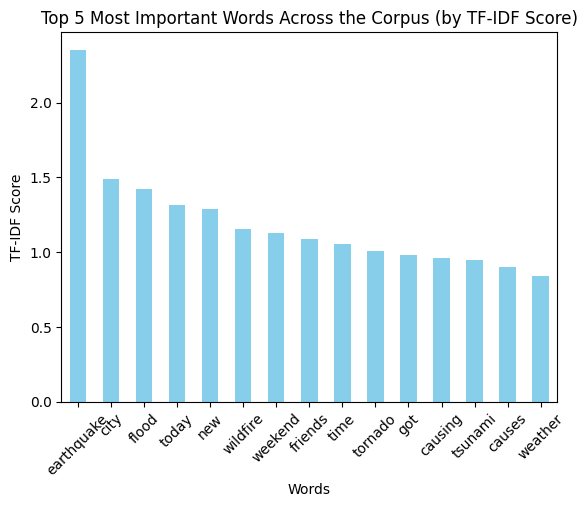

In [10]:
import matplotlib.pyplot as plt

# Bar plot for top 5 words by total TF-IDF score
top_5_words.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Important Words Across the Corpus (by TF-IDF Score)')
plt.ylabel('TF-IDF Score')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()